In [43]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
ot.RandomGenerator.SetSeed(42)

### Estimateur à noyau dans cadre spatial 

SOit un ensemble de données spatiales $(\mathbf{X}_1, \dots, \mathbf{X}_n)$ réparties aléatoirement dans un carré unitaire $[0,1]^2$, supposées provenant d’une variable aléatoire bidimensionnelle $X$ de densité de probabilité $p$. Le KDE permet d’estimer la densité $p$ à partir de l’échantillon, avec une approximation $\widehat{p}(\mathbf{x})$ de $p(\mathbf{x})$ pour tout point $\mathbf{x} \in [0,1]^2$.

En dimension $d = 2$, on utilise un noyau produit de deux noyaux unidimensionnels :
$$
K_2(\mathbf{x}) = K(x_1) \cdot K(x_2), \quad \text{où } \mathbf{x} = (x_1, x_2) \in [0,1]^2
$$


L'estimateur s’écrit :
$$
\widehat{p}(\mathbf{x}) = \frac{1}{n h_1 h_2} \sum_{i=1}^{n} K\left( \frac{x_1 - X_{i1}}{h_1} \right) \cdot K\left( \frac{x_2 - X_{i2}}{h_2} \right)
$$

où :

- $\mathbf{X}_i = (X_{i1}, X_{i2})$ est la $i$-ème observation spatiale
- $h_1$ et $h_2$ sont les fenêtres
- $K$ est le noyau gaussien



In [102]:
n_gaussians = 5
dimension = 2
n_samples = 10000

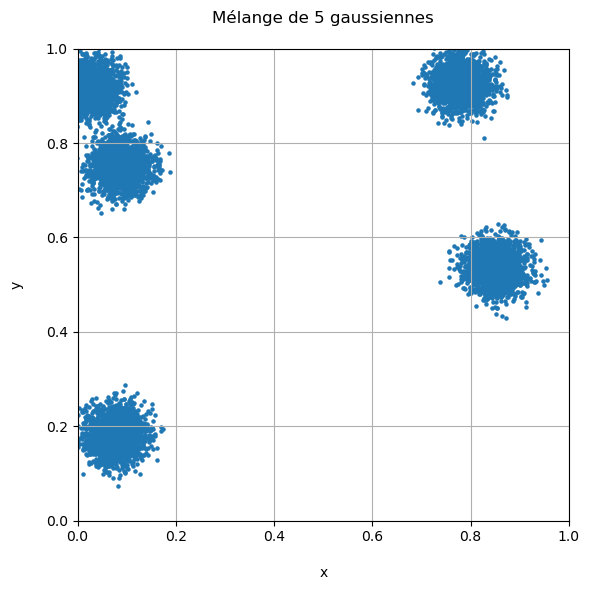

In [114]:
components = []
weights = []

for _ in range(n_gaussians):
    mu = [ot.RandomGenerator.Generate() for _ in range(dimension)]
    Sigma = ot.CovarianceMatrix(dimension)
    for i in range(dimension):
        Sigma[i, i] = 0.0009                 # variance faible pour visibilité
    
    gaussian = ot.Normal(mu, Sigma)
    components.append(gaussian)
    weights.append(1.0 / n_gaussians)        # poids uniforme pour chaque gaussienne 

mixture = ot.Mixture(components, weights)
sample = mixture.getSample(n_samples)
points = np.array(sample)


plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Mélange de 5 gaussiennes\n")
plt.xlabel("\nx")
plt.ylabel("y\n")
plt.grid(True)
plt.tight_layout()
plt.show()

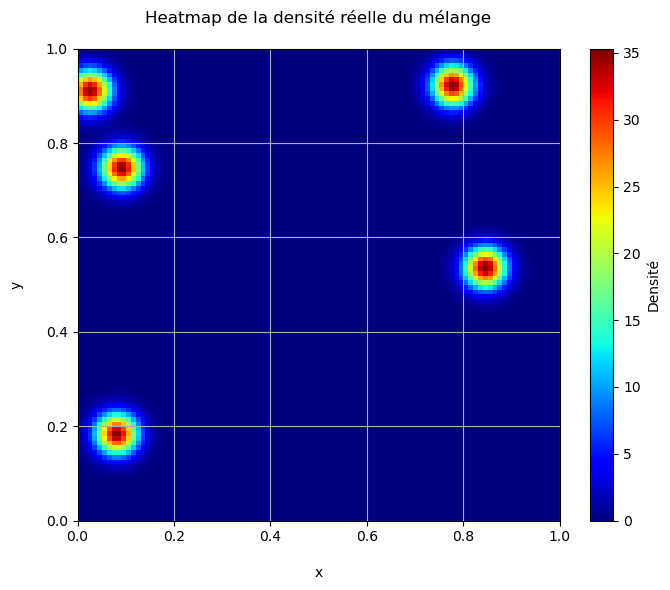

In [115]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

Z = np.array([mixture.computePDF(pt) for pt in grid_points])
true_density = Z.reshape(X.shape)

# --- Affichage ---
plt.figure(figsize=(7, 6))
plt.imshow(true_density, extent=[0, 1, 0, 1], origin='lower', cmap='jet', aspect='auto')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Heatmap de la densité réelle du mélange\n")
plt.xlabel("\nx")
plt.ylabel("y\n")
plt.grid(True)
plt.colorbar(label="Densité")
plt.tight_layout()
plt.show()


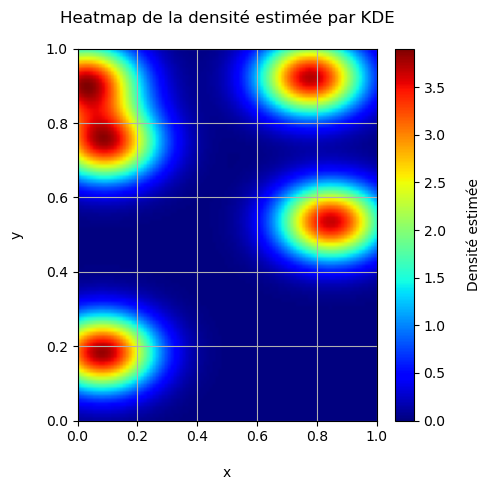

In [121]:
ks = ot.KernelSmoothing()
distribution = ks.build(sample)
Z = np.array([distribution.computePDF([x_, y_]) for x_, y_ in grid_points])
kde_density = Z.reshape(X.shape)

# Affichage Heatmap
plt.figure(figsize=(5, 5))
plt.imshow(kde_density, extent=[0, 1, 0, 1], origin="lower", cmap='jet', aspect='auto')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Heatmap de la densité estimée par KDE\n")
plt.xlabel("\nx")
plt.ylabel("y\n")
plt.grid(True)
plt.colorbar(label="\nDensité estimée")
plt.tight_layout()
plt.show()

In [ ]:
ks.getBandwidth()

class=Point name=Unnamed dimension=2 values=[0.118357,0.0638389]

In [123]:
ks.computeSilvermanBandwidth(sample)

class=Point name=Unnamed dimension=2 values=[0.118357,0.0638389]

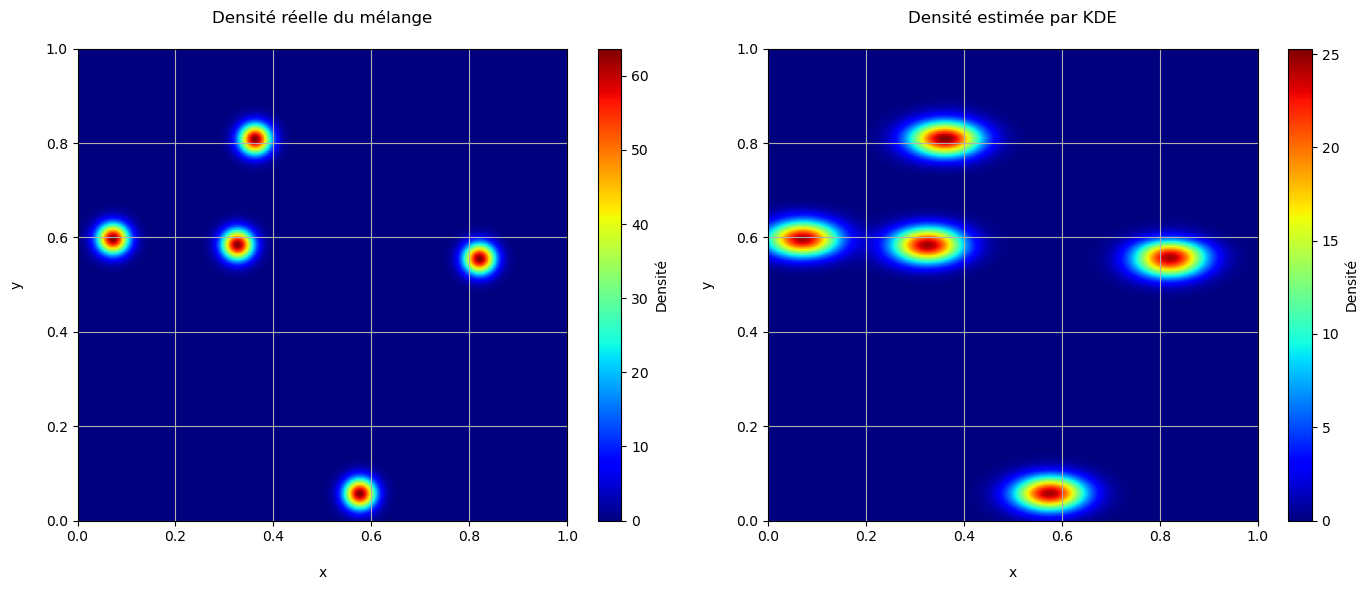

In [ ]:
x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

Z_true = np.array([mixture.computePDF(pt) for pt in grid_points])
true_density = Z_true.reshape(X.shape)

kde_dist = ot.KernelSmoothing().build(sample)
Z_kde = np.array([kde_dist.computePDF([x_, y_]) for x_, y_ in grid_points])
kde_density = Z_kde.reshape(X.shape)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
im1 = axs[0].imshow(true_density, extent=[0, 1, 0, 1], origin='lower', cmap='jet', aspect='auto')
axs[0].set_title("Densité réelle du mélange\n")
axs[0].set_xlabel("\nx")
axs[0].set_ylabel("y\n")
axs[0].grid(True)
fig.colorbar(im1, ax=axs[0], label="Densité")

im2 = axs[1].imshow(kde_density, extent=[0, 1, 0, 1], origin='lower', cmap='jet', aspect='auto')
axs[1].set_title("Densité estimée par KDE\n")
axs[1].set_xlabel("\nx")
axs[1].set_ylabel("y\n")
axs[1].grid(True)
fig.colorbar(im2, ax=axs[1], label="Densité")

plt.tight_layout()
plt.show()


In [110]:
mse = np.mean((Z_true - Z_kde) ** 2)
print(f"MSE  = {mse}")


MSE  = 10.049820058752452


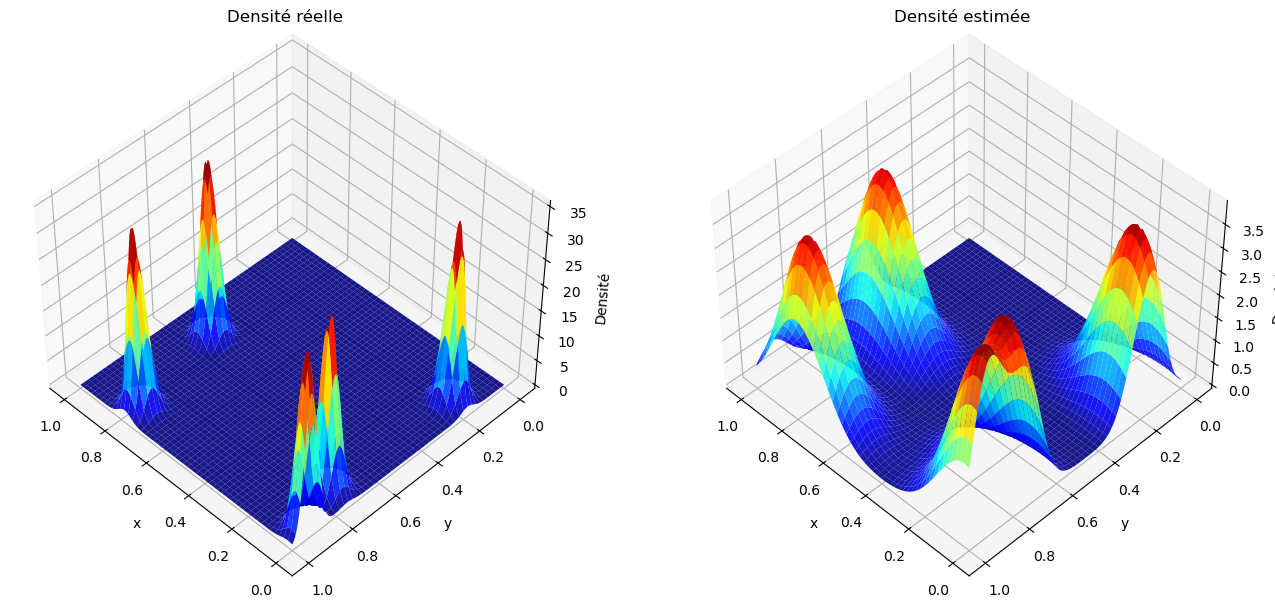

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour les graphes 3D

# Grille pour l'évaluation de la densité
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Densité réelle du mélange
Z_true = np.array([mixture.computePDF(p) for p in grid_points])
Z_true = Z_true.reshape(X.shape)

# Densité estimée par KDE
kde_dist = ot.KernelSmoothing().build(sample)
Z_kde = np.array([kde_dist.computePDF(p) for p in grid_points])
Z_kde = Z_kde.reshape(X.shape)

# Subplots 3D
fig = plt.figure(figsize=(14, 6))

# Densité réelle
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z_true, cmap='jet', linewidth=0, antialiased=True, alpha=0.9)
ax1.set_title("Densité réelle")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Densité")
ax1.view_init(elev=45, azim=135)

# Densité estimée (KDE)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z_kde, cmap='jet', linewidth=0, antialiased=True, alpha=0.9)
ax2.set_title("Densité estimée")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("Densité")
ax2.view_init(elev=45, azim=135)

plt.tight_layout()
plt.show()
